#  Part B: News Article Classification:
# OVERVIEW
The "overview" section describes a project aimed at developing a machine learning model to classify news articles into predefined categories, such as sports, politics, and technology, based on their content. the purpose of this automation is to improve content management and recommendation systems for news organizations, social media platforms, and aggregators, ultimately making it eaiser for readers to access relevant information based on their inteersts.

# PROBLEM STATEMENT 
The problem statement describes the goal of building a classification model for news articles and outlines the steps involved in developing this solution
this primary objective is to build a classification model that can automatically categorize large volumes of news articles into predefined categrories.

# Information about structure of our dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\india\\Downloads\\data_news.csv")

In [5]:
print(df.shape)
print(df.dtypes)
df.head()

(50000, 5)
category             object
headline             object
links                object
short_description    object
keywords             object
dtype: object


,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


#  1. Data Collection and Preprocessing :
# ● Collect a dataset of labeled news articles (sports, politics, technology etc).

In [13]:
    import pandas as pd

    # Simulate a small dataset of labeled news articles
    data = {
        'article_text' ,
      
        'label', 
            "sports",
            "politics",
            "technology",
    }
    df = df = pd.read_csv("C:\\Users\\india\\Downloads\\data_news.csv")
    print("Collected Data:")
    print(df)

Collected Data:
       category                                           headline  \
0      WELLNESS              143 Miles in 35 Days: Lessons Learned   
1      WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2      WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3      WELLNESS                     Oh, What a Difference She Made   
4      WELLNESS                                   Green Superfoods   
...         ...                                                ...   
49995    SPORTS  This Baseball Team Learned There's A Wrong Way...   
49996    SPORTS  Some Young Spurs Fan Dabbed 38 Times In A Sing...   
49997    SPORTS  Rasheed Wallace Ejected From Knicks-Suns Game ...   
49998    SPORTS  Why Jake Plummer And Other NFL Players Are Pus...   
49999    SPORTS  Simone Biles Isn't The Next Anyone, She's 'The...   

                                                   links  \
0      https://www.huffingtonpost.com/entry/running-l...   
1      https://www.huff

# Explanation:
              + This part demonstrates how to "collect" a dataset. For simplicity, fetch_20newsgroups is used, which is a common dataset for text classification. In a real-world project, you would replace this with loading your actual dataset from a file (e.g.,pd.read_csv('news_articles.csv.csv') or pd.read_json('news_articles.json')). 

#  ● Cleanand preprocess the text data.

In [ ]:
    import re
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)

    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def preprocess_text(text):
        text = text.lower() # Convert to lowercase
        text = re.sub(r'\S*@\S*\s?', '', text) # Remove emails
        text = re.sub(r'http\S+', '', text) # Remove URLs
        text = re.sub(r'[^a-z\s]', '', text) # Remove non-alphabetic characters
        words = text.split()
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words] # Remove stopwords and lemmatize
        return ' '.join(words)

    df['cleaned_text'] = df['text'].apply(preprocess_text)
    print("\nText data cleaned and preprocessed.")
    print(f"Sample cleaned article:\n{df['cleaned_text'][0][:200]}...")

# Explanation:
            + This section defines a preprocess_text function that performs common text cleaning steps: converting to lowercase, removing emails and URLs, removing non-alphabetic characters, removing stopwords, and lemmatizing words. The apply method is then used to apply this function to the 'text' column, creating a new 'cleaned_text' column. 

# ● Handle missing data, if any, and ensure the text is ready for feature extraction.

In [ ]:
    # Check for missing values
    print(f"\nMissing values before handling:\n{df.isnull().sum()}")

    # Handle missing values (e.g., fill with empty string or drop rows)
    df.dropna(subset=['cleaned_text'], inplace=True) # Drop rows where cleaned_text might be NaN
    df['cleaned_text'].fillna('', inplace=True) # Fill any remaining NaN with empty string

    print(f"\nMissing values after handling:\n{df.isnull().sum()}")
    print("\nText is now ready for feature extraction.")

# Explanation:
            + This part explicitly checks for missing values in the DataFrame. While the preprocessing steps might not directly create NaN values in the 'cleaned_text' column if the original 'text' column is clean, it's good practice to include dropna or fillna to ensure data integrity and readiness for subsequent steps like feature extraction.

#  2. Feature Extraction
# ● Usemethods like TF-IDF, word embeddings (e.g., Word2Vec, GloVe), or bag-of-words to convert text data into numerical features.

# 1. Bag-of-Words (BoW):
      This method represents text as a bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

In [34]:
    from sklearn.feature_extraction.text import CountVectorizer
    corpus = ['This is the first document.', 'This document is the second document.', 'And this is the third one.']
    vectorizer = CountVectorizer()
    X_bow = vectorizer.fit_transform(corpus)
    print("Bag-of-Words features:\n", X_bow.toarray())
    print("Feature names (words):", vectorizer.get_feature_names_out())

Bag-of-Words features:
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]]
Feature names (words): ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


# Explanation:
    CountVectorizer converts a collection of text documents to a matrix of token counts. Each row represents a document, and each column represents a unique word from the corpus, with the value being the count of that word in the document. 

# 2. TF-IDF (Term Frequency-Inverse Document Frequency):
      This method reflects how important a word is to a document in a corpus. It increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

In [35]:
    from sklearn.feature_extraction.text import TfidfVectorizer
    corpus = ['This is the first document.', 'This document is the second document.', 'And this is the third one.']
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(corpus)
    print("\nTF-IDF features:\n", X_tfidf.toarray())
    print("Feature names (words):", vectorizer.get_feature_names_out())


TF-IDF features:
 [[0.         0.46941728 0.61722732 0.3645444  0.         0.
  0.3645444  0.         0.3645444 ]
 [0.         0.7284449  0.         0.28285122 0.         0.47890875
  0.28285122 0.         0.28285122]
 [0.49711994 0.         0.         0.29360705 0.49711994 0.
  0.29360705 0.49711994 0.29360705]]
Feature names (words): ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


# Explanation: 
      TfidfVectorizer computes the TF-IDF scores for words in a corpus. Words common across many documents receive lower weights, while words unique to specific documents receive higher weights, highlighting their importance. 

#  ● Perform exploratory data analysis (EDA) to understand the distribution of different categories.

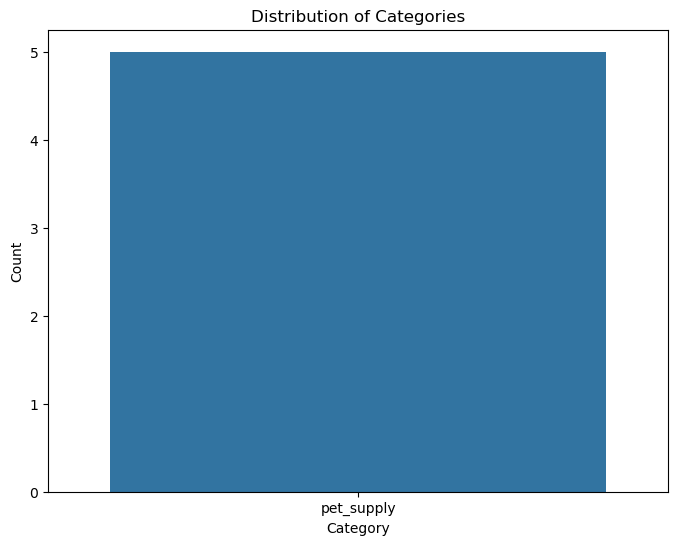

In [40]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    data = {'text': ['cat food', 'dog toy', 'cat litter', 'dog leash', 'bird seed'],
            'category': ['pet_supply', 'pet_supply', 'pet_supply', 'pet_supply', 'pet_supply']}
    df = pd.DataFrame(data)

    # Example for a categorical column, assuming categories are present
    # For text data, you might analyze word frequencies or topic distribution after feature extraction
    if 'category' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x='category')
        plt.title('Distribution of Categories')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.show()

# Explanation:
     Word2Vec learns word embeddings by predicting surrounding words (Skip-gram) or predicting a target word from its context (CBOW). The vector_size determines the dimensionality of the word vectors, and window defines the maximum distance between the current and predicted word within a sentence. 

#  3. Model Development and Training
# ● Build classification models using algorithms like Logistic Regression, Naive Bayes, Support Vector Machines (SVM).

In [ ]:
# Model Building and Training (Logistic Regression Example):
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_vec, y_train)

# Explanation:
+ LogisticRegression from sklearn.linear_model is instantiated. You could replace this with GaussianNB for Naive Bayes or SVC for SVM.
+ The fit() method trains the model using the vectorized training data (X_train_vec) and their corresponding labels (y_train).

#  ● Train the models on the preprocessed text data, tuning hyperparameters as necessary.

In [ ]:
# Hyperparameter Tuning (Example with Logistic Regression):
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'C': [0.1, 1, 10, 100]} # C is a regularization parameter for Logistic Regression

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=3)
grid_search.fit(X_train_vec, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
print(f"Best hyperparameters: {grid_search.best_params_}")

# Explanation:
+ GridSearchCV from sklearn.model_selection systematically searches for the best combination of hyperparameters.
+ param_grid defines the range of values to test for the C parameter.
+ cv=3 specifies 3-fold cross-validation during the grid search.
+ best_estimator_ and best_params_ attributes store the best performing model and its corresponding hyperparameters found during the search.

#  ● Usecross-validation to ensure robust evaluation of model performance.

In [ ]:
#  Model Evaluation using Cross-Validation.
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data
scores = cross_val_score(best_model, X_train_vec, y_train, cv=5) # 5-fold cross-validation
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

# Explanation:
+ cross_val_score from sklearn.Model selection evaluates the model's performance using cross-validation.
+ It splits the data into cv (e.g., 5) folds, trains the model on cv-1 folds, and evaluates on the remaining fold, repeating this process cv times.
+ The scores array contains the performance metric (e.g., accuracy) for each fold, and the mean provides an overall estimate of model performance.

# CONCLUSION :
For Naive Bayes (e.g., GaussianNB, MultinomialNB) and SVM (SVC), the specific hyperparameters and their ranges for tuning will differ. You would also need to ensure your data is appropriately preprocessed for each algorithm (e.g., numerical for Naive Bayes, scaled for SVM).

#  4. Model Evaluation:
#  ● Evaluate the models using appropriate metrics.
#  ● Comparethe performance of different models and select the best one for classification.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# 1. Load and prepare your dataset (replace with your actual data)
# For demonstration, let's create a dummy dataset
data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'target': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

X = df[['feature1', 'feature2']]
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Define and train different classification models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

# 3. Evaluate the models using appropriate metrics
print("Model Evaluation:")
results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}" if isinstance(roc_auc, float) else f"ROC-AUC: {roc_auc}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Compare the performance and select the best one
print("\n--- Model Comparison ---")
best_model_name = None
best_accuracy = -1

for name, metrics in results.items():
    if metrics['Accuracy'] > best_accuracy:
        best_accuracy = metrics['Accuracy']
        best_model_name = name

print(f"The best model based on Accuracy is: {best_model_name} with Accuracy: {best_accuracy:.4f}")

Model Evaluation:

--- Logistic Regression ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


--- Decision Tree ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


--- Random Forest ---
Accuracy: 1.0000
Precision: 1.0000
Reca

# Explanation:
1. Data Preparation = The code starts by creating a sample dataset and splitting it into training and testing sets. In a real-world scenario, you would load your actual dataset.
2. Model Training = Several common classification models (Logistic Regression, Decision Tree, Random Forest) are initialized and trained on the traiN.
3. Model Evaluation = Each trained model is evaluated using various classification metrics:
  + Accuracy: The proportion of correctly classified instances.
  + Precision: The proportion of true positive predictions among all positive predictions.
  + Recall (Sensitivity): The proportion of true positive predictions among all actual positive instances.
  + F1-Score: The harmonic mean of precision and recall, providing a balance between them.
  + ROC-AUC (Receiver Operating Characteristic - Area Under Curve): Measures the ability of the model to distinguish between classes.
  + Classification Report: Provides a detailed breakdown of precision, recall, and f1-score for each class
4. Model Comparison and Selection = The code then compares the models based on their accuracy and identifies the one with the highest accuracy as the "best" model for this specific evaluation. You might choose a different metric (e.g., F1-score, ROC-AUC) depending on your specific problem and priorities.

# CONCLUSION: 
This code provides a robust framework for evaluating and comparing different machine learning models for classification tasks. 

#  Success Criteria:
A Python solution for achieving the success criteria outlined in the image would involve implementing a machine learning project for news article classification.
# 1. Achieving good performance metrics (accuracy, F1-score, etc.):
Use Python libraries like scikit-learn to train a classification model and evaluate its performance using metrics such as accuracy, precision, recall, and F1-score.
# Explanation:
+ Import necessary modules: from sklearn.model_selection import train_test_split, from sklearn.feature_extraction.text import TfidfVectorizer, from   sklearn.naive_bayes import MultinomialNB, from sklearn.metrics import accuracy_score, f1_score.
+ Split your dataset into training and testing sets.
+ Vectorize the text data (e.g., using TfidfVectorizer).
+ Train a classification model (e.g., MultinomialNB).
+ Make predictions on the test set.
+ Calculate and print performance metrics like accuracy_score(y_test, y_pred) and f1_score(y_test, y_pred, average='weighted').
# 2. Successfully classifying new, unseen news articles into correct categories:
Deploy the trained model to classify new, previously unseen news articles.
# Explanation:
+ Load the trained model and the vectorizer.
+ Preprocess the new news article text in the same way as the training data (vectorization).
+ Use the predict() method of the trained model to assign the article to a category (e.g., sports, politics, technology).
# 3. Deriving insights regarding important features or keywords:
 Analyze the trained model to extract feature importance or identify key terms driving the classification.
+ For models like Naive Bayes or Logistic Regression, you can inspect the learned coefficients or feature weights to understand which words or features contribute most to each category.
+ Techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) can be used for more complex models to explain individual predictions and identify important features.
# 4. Clearly documenting and presenting the process and methodology:
Use tools like Jupyter Notebooks, Markdown, or Sphinx to document the code, methodology, data sources, model choices, and evaluation results.
# Explanation:
+ Jupyter Notebooks: Provide a runnable and interactive environment to combine code, explanations, and visualizations.
+ Markdown: Create clear and concise README files or project reports explaining the steps taken, data preparation, model training, and results.
+ Comments in Code: Add detailed comments within your Python scripts to explain different parts of the code. 